In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_excel('Лабораторная_работа_4.xlsx', sheet_name = '4', names = ['num', 'Класс', 'x1', 'x2', 'x3', 'x4']).drop('num', axis = 1)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


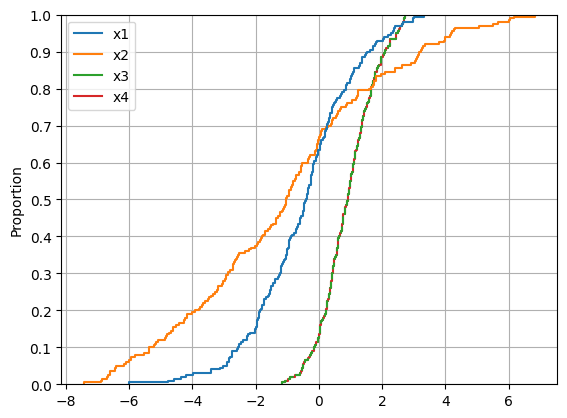

In [5]:
# Эмпирические функции распределения столбцов
ax = sns.ecdfplot(data.drop(columns = 'Класс'))
ax.axes.set_yticks(np.arange(start = 0, stop = 1.1, step = 0.1))
ax.grid()

# Столбцы x3 и x4 полностью совпадают >> линия прерывистая
ax.lines[1].set_linestyle('--')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead 

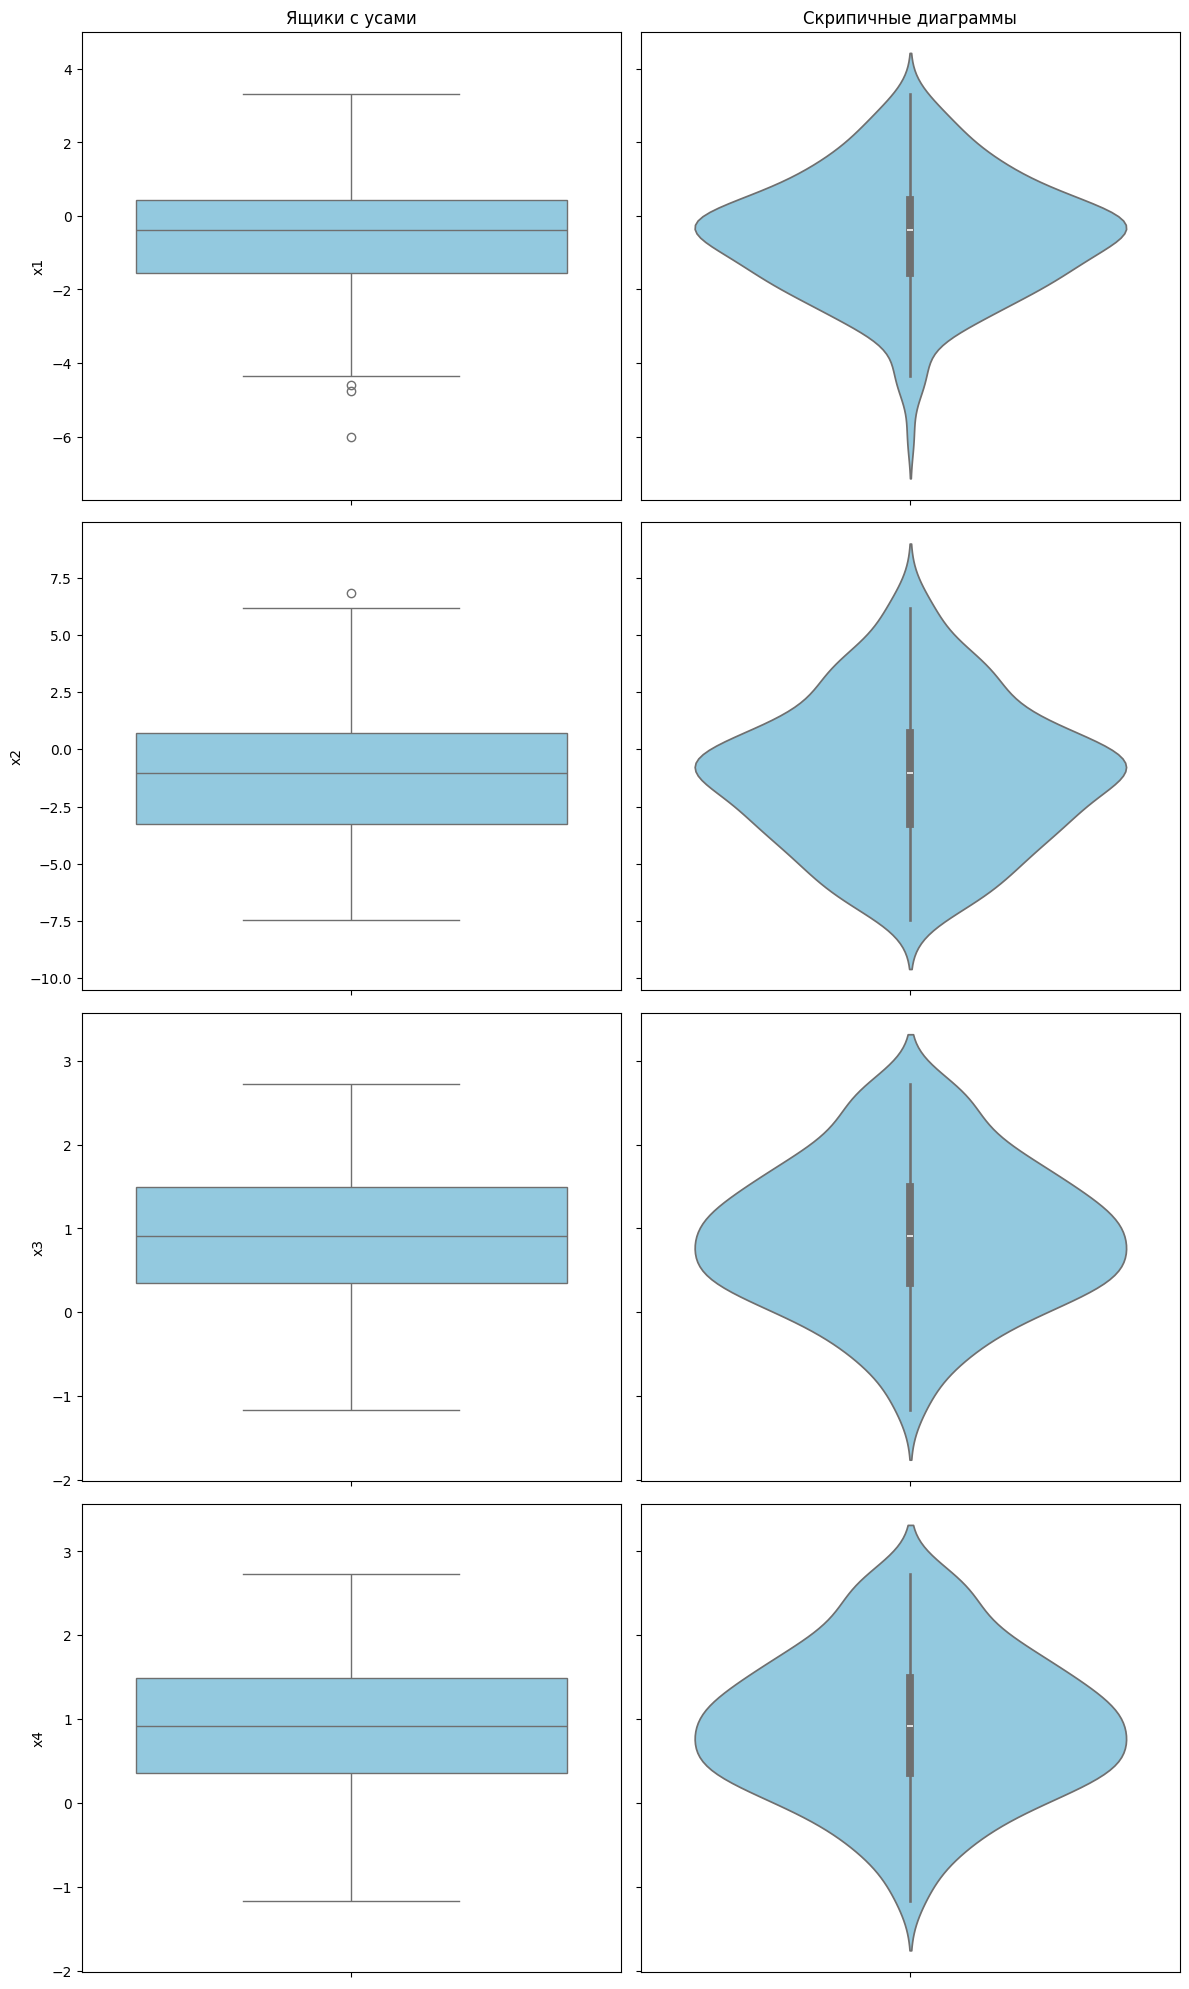

In [6]:
# Ящики с усами и скрипичные диаграммы
X = data.drop('Класс', axis = 1, inplace = False)

fig, axes = plt.subplots(nrows = len(X.columns), ncols = 2, figsize = (12, 20), sharey = 'row')

for i, col in enumerate(X.columns):
    sns.boxplot(y = col, data = data, ax = axes[i, 0], color = 'skyblue')
    sns.violinplot(y = col, data = data, ax = axes[i, 1], color = 'skyblue')

axes[0, 0].set_title('Ящики с усами')
axes[0, 1].set_title('Скрипичные диаграммы')
plt.tight_layout()
plt.show()

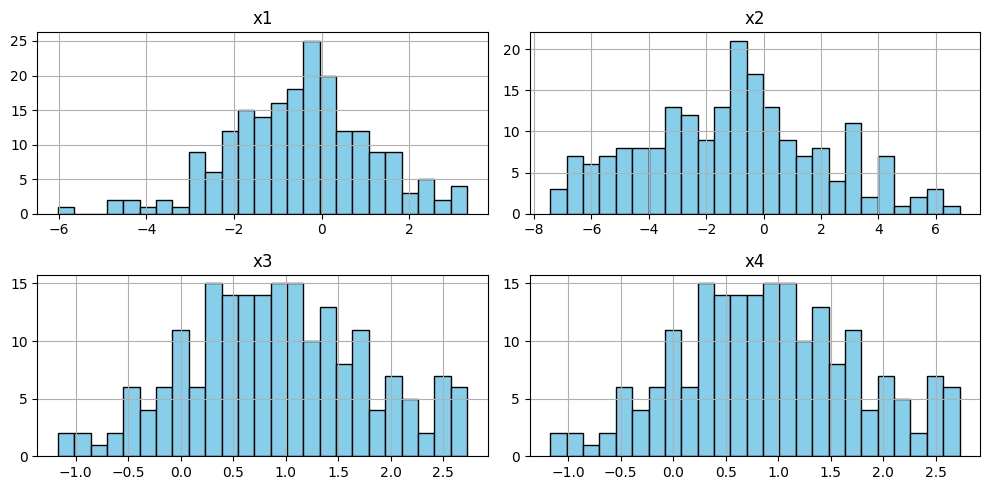

In [7]:
# Гистограммы
X.iloc[:,0:].hist(figsize = (10, 5), bins = 25, color = 'skyblue', edgecolor = 'black')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

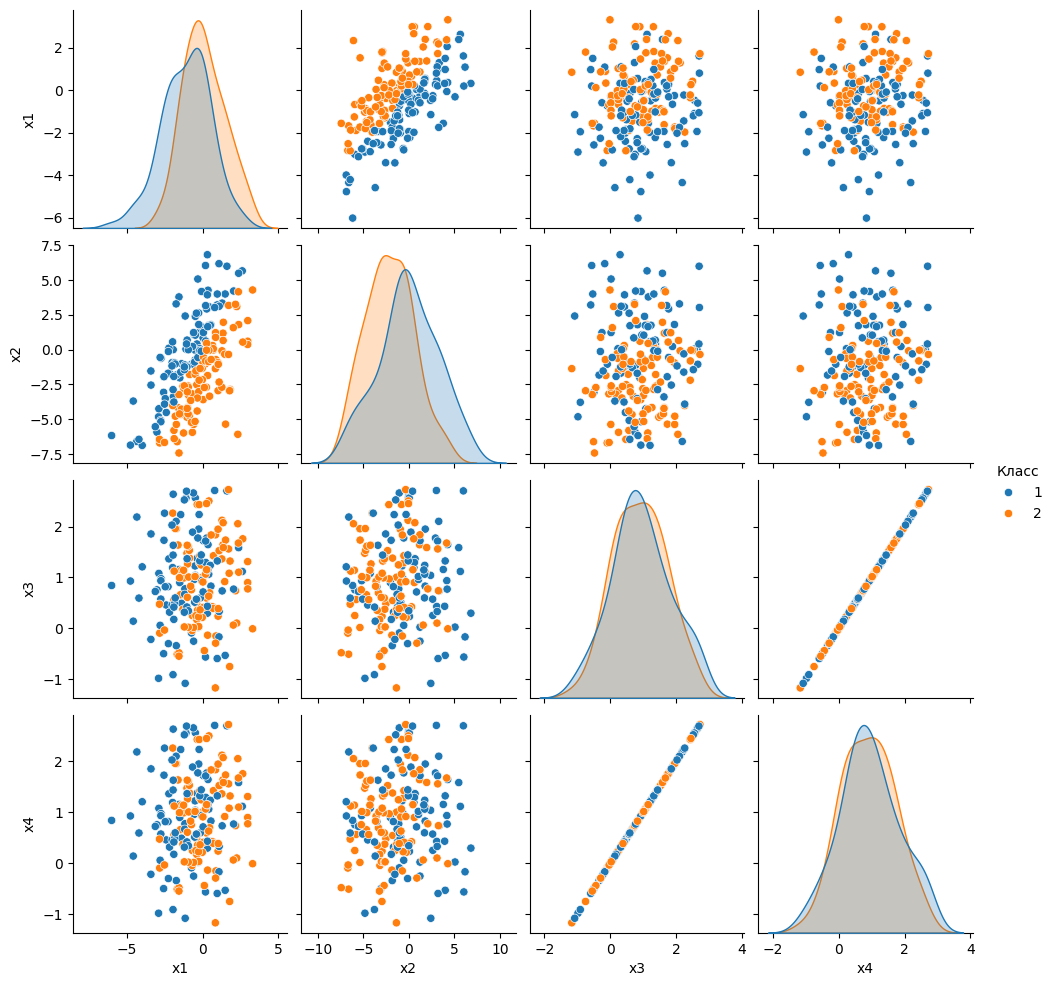

In [8]:
# Диаграммы рассеяния с указанием класса
data['Класс'] = data['Класс'].astype(str)
sns.pairplot(data, vars = X.columns, diag_kind = 'kde', diag_kws = dict(fill = True), hue = 'Класс')
plt.show()

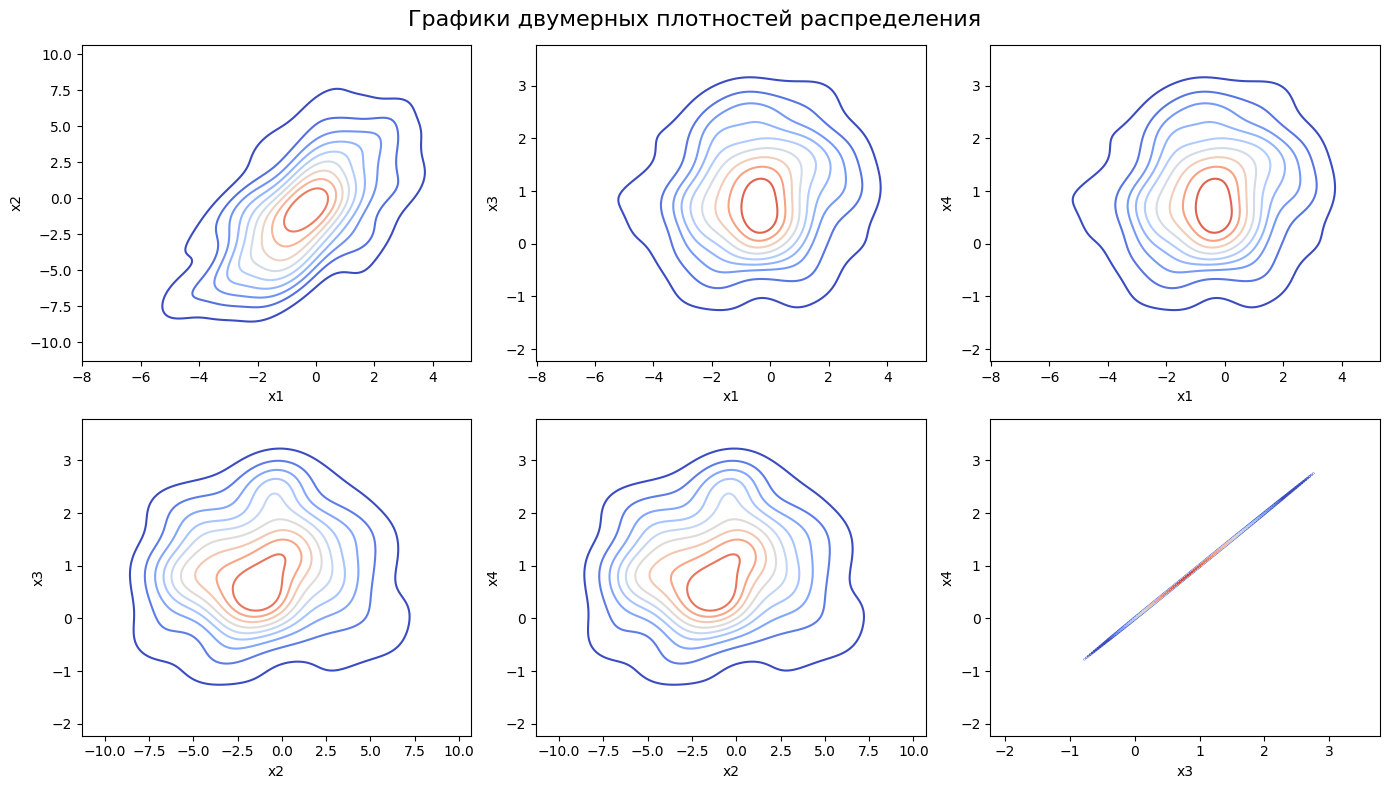

In [9]:
# Графики двумерных плотностей распределения
pairs = [('x1', 'x2'), ('x1', 'x3'), ('x1', 'x4'), ('x2', 'x3'), ('x2', 'x4'), ('x3', 'x4')]
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 8))

for ax, (x_col, y_col) in zip(axes.flat, pairs):
    sns.kdeplot(x = data[x_col], y = data[y_col], cmap = "coolwarm", ax = ax)

fig.suptitle('Графики двумерных плотностей распределения', fontsize=16)
plt.tight_layout()
plt.show()

In [10]:
# Стандартизация данных для 6 задания
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X.astype('float64'))
Xsc = sc.transform(X.astype('float64'))
Xsc = pd.DataFrame(Xsc, index = X.index, columns = X.columns)
Xsc['Класс'] = data['Класс']
Xsc

,x1,x2,x3,x4,Класс
0,-0.146533,0.012151,-1.186637,-1.186637,1
1,-1.500185,-1.203345,-2.235712,-2.235712,1
2,-0.000384,0.107270,0.361322,0.361322,1
3,0.071931,-0.461223,-0.510967,-0.510967,2
4,-0.660516,1.567727,0.279389,0.279389,1
...,...,...,...,...,...
195,1.589025,1.704284,-0.174225,-0.174225,1
196,-0.903290,-0.576417,0.612398,0.612398,1
197,1.785122,1.686165,0.890193,0.890193,2
198,-0.179646,-0.825899,-0.107639,-0.107639,2


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

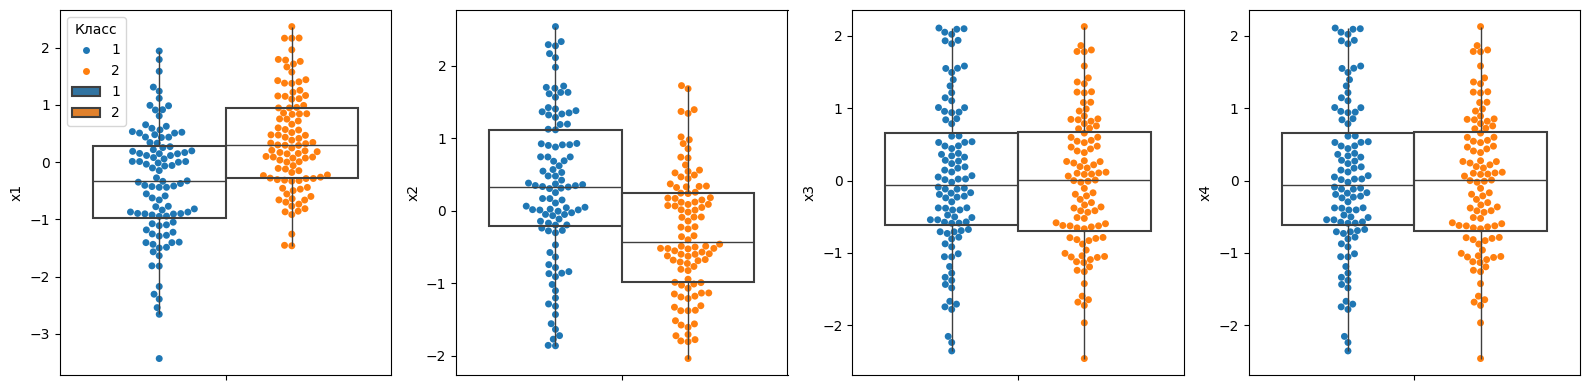

In [11]:
# Комбинированные диаграммы по стандартизированным данным
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, col in enumerate(X.columns):
    sns.swarmplot(y = col, hue = 'Класс', data = Xsc, dodge = True, ax = axes[i])
    sns.boxplot(
        y = col, hue = 'Класс', data = Xsc, showcaps = False,
        boxprops = {'facecolor': 'None', 'linewidth': 1.5, 'zorder': 10},
        showfliers = False, whiskerprops = {'linewidth': 1., 'zorder': 10},
        ax = axes[i], zorder = 10
    )

# Делаем общую легенду
handles, labels = axes[0].get_legend_handles_labels()
for ax in axes:
    ax.get_legend().remove()
axes[0].legend(handles, labels, loc='upper left', title = 'Класс')

plt.tight_layout()
plt.show()